In [162]:
import sqlite3
import pandas
import numpy as np

## Part 1
## Problem 1
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT teamID, yearID, sum(salary)/1000 as total_payroll_by_thousand, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID, yearID"

team_salaries = pandas.read_sql(salary_query, conn)

team_query = "SELECT (W*100.0/G) as winning_percentage, * FROM Teams GROUP BY teamID, yearID"

mean_query = "SELECT yearID, sum(salary)/count(salary) as salary_mean FROM Salaries GROUP BY yearID"

team_table = pandas.read_sql(team_query, conn)
mean_table = pandas.read_sql(mean_query,conn)
#team_salaries
result = pandas.merge(team_salaries, team_table, how='outer', on=['teamID','yearID'])
result = pandas.merge(result, mean_table, how='outer', on=['yearID'])
#team_table
result

,teamID,yearID,total_payroll_by_thousand,payroll_mean,winning_percentage,lgID,franchID,divID,Rank,G,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary_mean
0,ATL,1985,14807.000,673045.454545,40.740741,NL,ATL,W,5.0,162.0,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105.0,106.0,ATL,ATL,ATL,476299.447273
1,BAL,1985,11560.712,525486.909091,51.552795,AL,BAL,E,4.0,161.0,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97.0,97.0,BAL,BAL,BAL,476299.447273
2,BOS,1985,10897.560,435902.400000,49.693252,AL,BOS,E,5.0,163.0,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104.0,104.0,BOS,BOS,BOS,476299.447273
3,CAL,1985,14427.894,515281.928571,55.555556,AL,ANA,W,2.0,162.0,...,0.98,California Angels,Anaheim Stadium,2567427.0,100.0,100.0,CAL,CAL,CAL,476299.447273
4,CHA,1985,9846.178,468865.619048,52.147239,AL,CHW,W,3.0,163.0,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104.0,104.0,CHW,CHA,CHA,476299.447273
5,CHN,1985,12702.917,577405.318182,47.530864,NL,CHC,E,4.0,162.0,...,0.97,Chicago Cubs,Wrigley Field,2161534.0,110.0,110.0,CHC,CHN,CHN,476299.447273
6,CIN,1985,8359.917,379996.227273,54.938272,NL,CIN,W,2.0,162.0,...,0.98,Cincinnati Reds,Riverfront Stadium,1834619.0,104.0,105.0,CIN,CIN,CIN,476299.447273
7,CLE,1985,6551.666,327583.300000,37.037037,AL,CLE,E,7.0,162.0,...,0.97,Cleveland Indians,Cleveland Stadium,655181.0,99.0,100.0,CLE,CLE,CLE,476299.447273
8,DET,1985,10348.143,517407.150000,52.173913,AL,DET,E,3.0,161.0,...,0.97,Detroit Tigers,Tiger Stadium,2286609.0,100.0,98.0,DET,DET,DET,476299.447273
9,HOU,1985,9993.051,499652.550000,51.234568,NL,HOU,W,3.0,162.0,...,0.97,Houston Astros,Astrodome,1184314.0,97.0,96.0,HOU,HOU,HOU,476299.447273


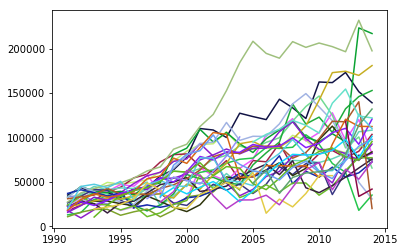

In [163]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

## Part 2
## Problem 2
result.sort_values("yearID", ascending=True)
temp_result = result[result['yearID'] > 1990] 
temp_result = temp_result[temp_result['yearID'] <= 2014]
teams = temp_result['teamID'].drop_duplicates()
temp_result = temp_result[['yearID', 'teamID', 'total_payroll_by_thousand']]
temp_result = temp_result.set_index('teamID')
for t in teams:
    plt.plot(temp_result.loc[t,'yearID'], temp_result.loc[t,'total_payroll_by_thousand'],color=numpy.random.rand(3,))

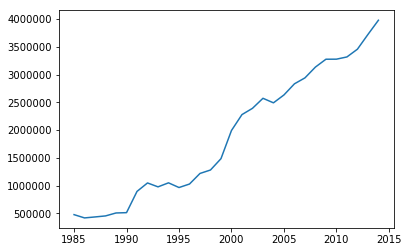

In [164]:
## Problem 3
result.sort_values("salary_mean", ascending=True)
plt.plot(result['yearID'],result['salary_mean'])

In [165]:
## Problem 4
new_query = "SELECT  teamID,yearID, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
new_query2 = "SELECT  teamID,yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID,yearID"
query1 = pandas.read_sql(new_query, conn)
query2 = pandas.read_sql(new_query2,conn)

group_table = pandas.merge(query1, query2, how='outer', on=['yearID','teamID'])

bins = [1989,1994,1999,2004,2009,2015]
group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
categories = pandas.cut(group_table['yearID'],bins,labels=group_names)
group_table['categories'] = pandas.cut(group_table['yearID'], bins, labels=group_names)

grouped = group_table.groupby('categories')

group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2015')

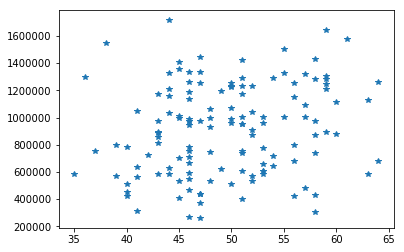

In [166]:
## Plot for 1990-1994
plt.plot(group1['winning_percentage'],group1['payroll_mean'],'*')

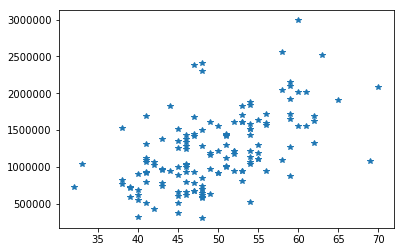

In [167]:
## Plot for 1995-1999
plt.plot(group2['winning_percentage'],group2['payroll_mean'],'*')

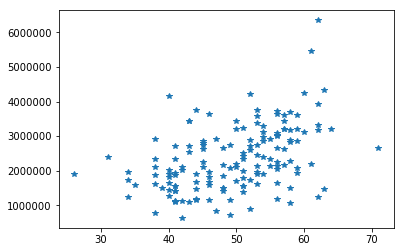

In [168]:
## Plot for 2000-2004
plt.plot(group3['winning_percentage'],group3['payroll_mean'],'*')

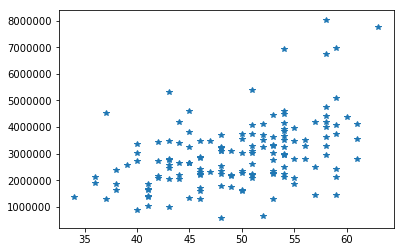

In [169]:
## Plot for 2005-2009
plt.plot(group4['winning_percentage'],group4['payroll_mean'],'*')

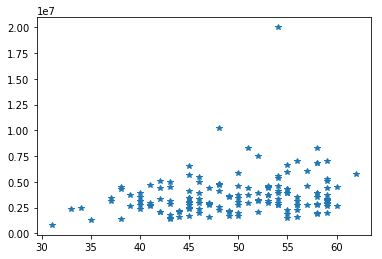

In [170]:
## Plot for 2010-2015
plt.plot(group5['winning_percentage'],group5['payroll_mean'],'*')

In [171]:
## Problem 5
import statistics
query1
curr = 1985
payroll_lst = []
payroll_avg = {}
payroll_std = {}

for index, row in query1.iterrows():
    if curr == row['yearID']:
        payroll_lst.append(row['payroll_mean'])
    else:
        avg = statistics.mean(payroll_lst)
        std = statistics.stdev(payroll_lst)
        payroll_avg[curr] = avg
        payroll_std[curr] = std
        curr = row['yearID']
        payroll_lst= [row['payroll_mean']]
        
payroll_std[curr] = statistics.stdev(payroll_lst)
payroll_avg[curr] = statistics.mean(payroll_lst)

stand_lst = []

for index, row in query1.iterrows():
    curr = row['yearID']
    payroll = row['payroll_mean']
    stand_lst.append((payroll - payroll_avg[curr]) / payroll_std[curr])
    
query1['Standardized_Payroll'] = stand_lst

query1

,teamID,yearID,payroll_mean,Standardized_Payroll
0,ATL,1985,6.730455e+05,1.946823
1,BAL,1985,5.254869e+05,0.500248
2,BOS,1985,4.359024e+05,-0.377984
3,CAL,1985,5.152819e+05,0.400205
4,CHA,1985,4.688656e+05,-0.054832
5,CHN,1985,5.774053e+05,1.009225
6,CIN,1985,3.799962e+05,-0.926054
7,CLE,1985,3.275833e+05,-1.439879
8,DET,1985,5.174072e+05,0.421039
9,HOU,1985,4.996525e+05,0.246984


In [172]:
## Problem 6

group_table = pandas.merge(query1, query2, how='outer', on=['yearID','teamID'])

bins = [1989,1994,1999,2004,2009,2015]
group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
categories = pandas.cut(group_table['yearID'],bins,labels=group_names)
group_table['categories'] = pandas.cut(group_table['yearID'], bins, labels=group_names)

grouped = group_table.groupby('categories')

group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2015')

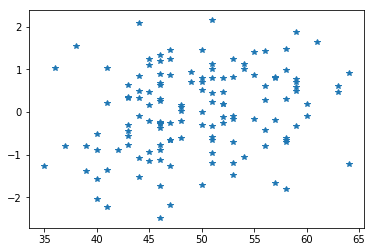

In [173]:
## Plot for 1990-1994
plt.plot(group1['winning_percentage'],group1['Standardized_Payroll'],'*')

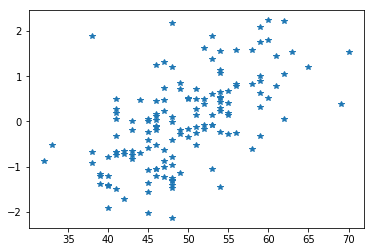

In [174]:
## Plot for 1995-1999
plt.plot(group2['winning_percentage'],group2['Standardized_Payroll'],'*')

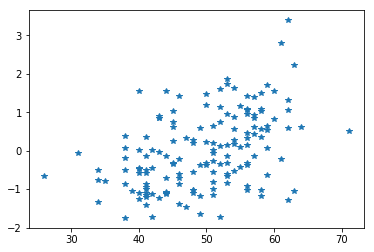

In [175]:
## Plot for 2000-2004
plt.plot(group3['winning_percentage'],group3['Standardized_Payroll'],'*')

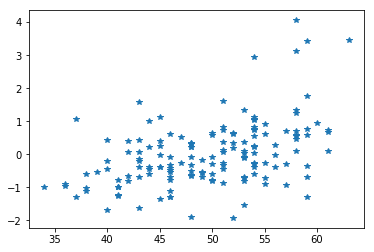

In [176]:
## Plot for 2005-2009
plt.plot(group4['winning_percentage'],group4['Standardized_Payroll'],'*')

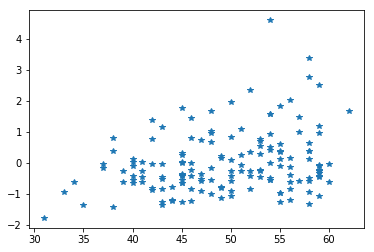

In [177]:
## Plot for 2010-2015
plt.plot(group5['winning_percentage'],group5['Standardized_Payroll'],'*')

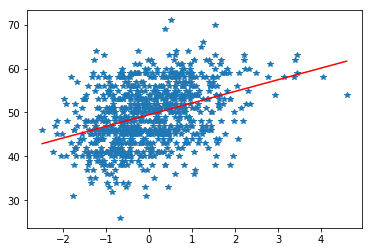

In [182]:
## Problem 7

group_table = group_table[np.isfinite(group_table['winning_percentage'])]
group_table = group_table[np.isfinite(group_table['Standardized_Payroll'])]

# add line
slope, intercept = np.polyfit(group_table['Standardized_Payroll'], group_table['winning_percentage'], 1)
points = np.linspace(group_table['Standardized_Payroll'].min(),group_table['Standardized_Payroll'].max(),100)
plt.plot(group_table['Standardized_Payroll'],group_table['winning_percentage'],'*')
plt.plot(points, slope*points+intercept, color='r')


In [186]:
## Problem 8

efficiency = []

for index, row in group_table.iterrows():
    efficiency.append(group_table['winning_percentage'] - 50 + 2.5 * group_table['Standardized_Payroll'])
    
group_table['efficiency'] = efficiency



ValueError: setting an array element with a sequence.

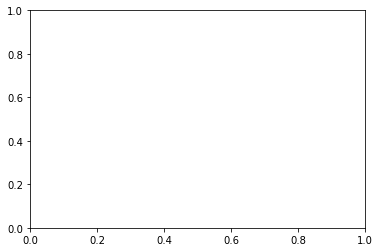

In [241]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

group_table.sort_values("yearID", ascending=True)
temp_result = group_table[group_table['yearID'] > 1990] 
temp_result = temp_result[temp_result['yearID'] <= 2014]
teams = temp_result['teamID'].drop_duplicates()
temp_result = temp_result[['yearID', 'teamID', 'efficiency']]
temp_result = temp_result.set_index('teamID')

for t in teams:
    plt.plot(temp_result.loc[t,'yearID'],temp_result.loc[t,'efficiency'], color=np.random.rand(3,1))